In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import math

def simulate(N):
    loops = 0
    bowl = np.concatenate((np.arange(1,N+1), np.arange(1,N+1)))
    
    for i in range(N):
        random_indices = np.random.choice(len(bowl), size=2, replace=False)
        X = bowl[random_indices]
        x1 = X[0]
        x2 = X[1]
        # Remove the randomly selected elements from the list
        bowl = np.delete(bowl, random_indices)

        if x1 == x2:
            loops +=1
        else:
            # When 2 different ends are tied, other 2 ends of those strings must be set to same value as they are now same string
            j = np.where(bowl == x2)
            bowl[j] = x1
    return(loops)

def average(N, n):
    loops = np.array([])
    for i in range(n):
        loops = np.append(loops, simulate(N))
    return np.mean(loops)

def theoretical(N):
    x=0
    for i in range(1,N):
        x += 1/(2*i-1)
    return x

print('g')

g


In [2]:
table = []

for i in range(100, 1001, 100):
    L = average(i, i)
    t = theoretical(i)
    e = np.abs(L-t)
    table.append([i, L, t, e])

headers = ['N (# strings in bowl)', 'Simulated # of Loops', 'Theoretical # of Loops', 'Error']

    
print(tabulate(table, headers, tablefmt="simple_grid", floatfmt=".8f"))


┌─────────────────────────┬────────────────────────┬──────────────────────────┬────────────┐
│   N (# strings in bowl) │   Simulated # of Loops │   Theoretical # of Loops │      Error │
├─────────────────────────┼────────────────────────┼──────────────────────────┼────────────┤
│                     100 │             3.28000000 │               3.27931706 │ 0.00068294 │
├─────────────────────────┼────────────────────────┼──────────────────────────┼────────────┤
│                     200 │             3.64000000 │               3.62840795 │ 0.01159205 │
├─────────────────────────┼────────────────────────┼──────────────────────────┼────────────┤
│                     300 │             3.94000000 │               3.83197703 │ 0.10802297 │
├─────────────────────────┼────────────────────────┼──────────────────────────┼────────────┤
│                     400 │             4.03250000 │               3.97623585 │ 0.05626415 │
├─────────────────────────┼────────────────────────┼──────────────────

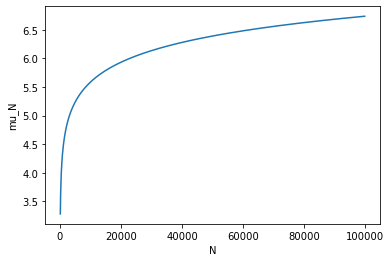

In [8]:
n = np.arange(100,100000,100)
mu = [theoretical(i) for i in n]
plt.plot(n,mu)
plt.xlabel('N')
plt.ylabel('mu_N')
plt.show()

In [12]:
def simulate2(N):
    loops = []
    bowl = np.concatenate((np.arange(1,N+1), np.arange(1,N+1)))
    for i in range(N):
        random_indices = np.random.choice(len(bowl), size=2, replace=False)
        X = bowl[random_indices]
        x1 = X[0]
        x2 = X[1]
        # Remove the randomly selected elements from the list
        bowl = np.delete(bowl, random_indices)
        loops.append([x1,x2])

    return(loops)

def connect(N):
    loops = simulate2(N)
    x0 = loops[0,0]
    
from collections import defaultdict

def find_connected_components(arr):
    graph = defaultdict(list)
    for pair in arr:
        for num in pair:
            graph[num].append(pair)

    visited = set()
    connected_components = []

    for pair in arr:
        if tuple(pair) not in visited:
            component = set()
            queue = [pair]
            while queue:
                current_pair = queue.pop(0)
                if tuple(current_pair) not in visited:
                    visited.add(tuple(current_pair))
                    component.update(current_pair)
                    for num in current_pair:
                        for neighbor in graph[num]:
                            if neighbor not in queue and tuple(neighbor) not in visited:
                                queue.append(neighbor)
            if component:
                connected_components.append(list(component))

    return connected_components


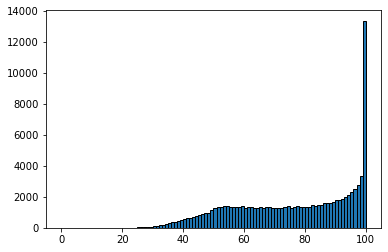

In [13]:
def longest_loop(N):
    pairs = simulate2(N)
    loops = find_connected_components(pairs)
    lengths = []
    for i in range(len(loops)):
        lengths.append(len(loops[i]))
    lloop = np.max(lengths)                  
    return lloop

data = []        
for i in range(100000):
    data.append(longest_loop(100))
    
plt.hist(data, bins=100, range = (0,100), edgecolor='black') 
plt.show()

┌─────────────────────────┬─────────────────────────────────────────┐
│   N (# strings in bowl) │                         # unique graphs │
├─────────────────────────┼─────────────────────────────────────────┤
│                       1 │                                       1 │
├─────────────────────────┼─────────────────────────────────────────┤
│                       2 │                                       3 │
├─────────────────────────┼─────────────────────────────────────────┤
│                       3 │                                      14 │
├─────────────────────────┼─────────────────────────────────────────┤
│                       4 │                                      88 │
├─────────────────────────┼─────────────────────────────────────────┤
│                       5 │                                     694 │
├─────────────────────────┼─────────────────────────────────────────┤
│                       6 │                                    6578 │
├───────────────────

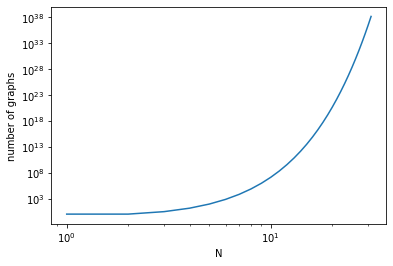

In [14]:
# Calculates the first n x_N
def total(n):
    x = [1]
    table = []
    for i in range(1, n+1):
        y = 0
        for k in range(1, i+1):
            y += math.comb(i,k)*math.factorial(k-1)*x[i-k]
        x.append(y)
        table.append([i, y])
    return table, x

table, x = total(30)
headers = ['N (# strings in bowl)', '# unique graphs']

    
print(tabulate(table, headers, tablefmt="simple_grid"))

plt.loglog(np.arange(1,32), x)
plt.xlabel('N')
plt.ylabel('number of graphs')
plt.show()


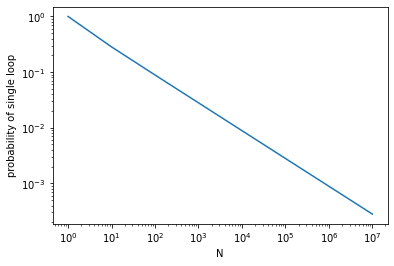

In [15]:
def oneloop(n):
    x = 1
    for i in range(1,n):
        x *= (2*i)/(2*i+1)
    return x

n = [10**i for i in range (8)]
p = []
for _ in n:
    p.append(oneloop(_))

plt.loglog(n,p)
plt.xlabel('N')
plt.ylabel('probability of single loop')
plt.show()
    


In [17]:
def P(N, i):
    numerator = math.prod(range(2*N - 2*i + 2, 2*N + 1, 2))
    denominator = math.prod(range(2*N - 1, 2*N - 2*i, -2))
    return numerator / denominator

def T(N):
    total = 0
    for i in range(1, N + 1):
        total += i * P(N, i)
    return total

N = 5
result = T(N)
print(result)

36.666666666666664
